In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
import itertools
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

#### Figure aesthetics

In [2]:
#print(plt.style.available)
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

#### Downlad data

In [3]:
def get_data():
    ##Get data from the source that is used to generate map (based on WHO official data):
    ##https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR0oKIKJlc-zeNZGFBVEN0-O-58daoCDaKicXwC10cjFWgCZqTPgavseTfI#/bda7594740fd40299423467b48e9ecf6
    url_confirmed = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    url_deaths = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    url_recovered = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"        
    for url, data_type in zip([url_confirmed, url_deaths, url_recovered], ["confirmed", "deaths", "recovered"]):
    
        r = requests.get(url)
        filename=data_type+".csv"
        f = open(filename,'wb')
        f.write(r.content)

In [4]:
get_data()

#### Prepare dataset

In [5]:
## prepare dataset
confirmed = pd.read_csv("confirmed.csv")
deaths = pd.read_csv("deaths.csv")
recovered = pd.read_csv("recovered.csv")

def reshape_single_dataset(data):
    data=data.drop(columns=["Province/State", "Lat", "Long"])
    ## aggregate data for each country
    data=data.groupby("Country/Region").sum().reset_index()
    ## reshape data
    data.reset_index(drop=True, inplace=True)
    data=data.set_index("Country/Region")
    #data=data.transpose().reset_index().rename(columns={'index':'Date'})
    #data['Date'] = pd.to_datetime(data['Date'])
    
    return data

confirmed = reshape_single_dataset(confirmed)
deaths = reshape_single_dataset(deaths)
recovered = reshape_single_dataset(recovered)

In [6]:
inactive=deaths.add(recovered)
#data=confirmed.subtract(inactive)
data = confirmed
data_in = inactive

data=data.transpose().reset_index().rename(columns={'index':'Date'})
data['Date'] = pd.to_datetime(data['Date'])

data_in=data_in.transpose().reset_index().rename(columns={'index':'Date'})
data_in['Date'] = pd.to_datetime(data_in['Date'])

#### List of countries in dataset

In [7]:
for el in data.columns:
    print(el)

Date
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta


In [8]:
def exponent(x, a, b, c):
    return a * np.exp(b * (x-c))

def sigmoid(x, L , k, b, x0):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return y

def generalised_sigmoid(x, K, C, B, mi, x0):
    y = K / (C + np.exp(-B*(x-x0)))**(1/mi)
    #penalization = abs(1.0 - C)*1000000
    #penalization2 = abs(2 - (C + np.exp(-B*(77-x0)))**(1/mi))*100
    #return y + penalization + penalization2
    return y


#### Choose countries to plot (separate by ";" )

In [9]:
countries_to_plot="Poland".split(";")
#Austria was good
#countries_to_plot=['Poland', 'Bosnia and Herzegovina', 'Hungary', 'Slovenia', 'South Africa', 'Tunisia']

#### Make plot

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106.]


/Users/maciejj/anaconda3/envs/corona-vis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/maciejj/anaconda3/envs/corona-vis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/Users/maciejj/anaconda3/envs/corona-vis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


[4.27561833e+05 1.83429743e+01 9.92833103e+01]
mu 102.0


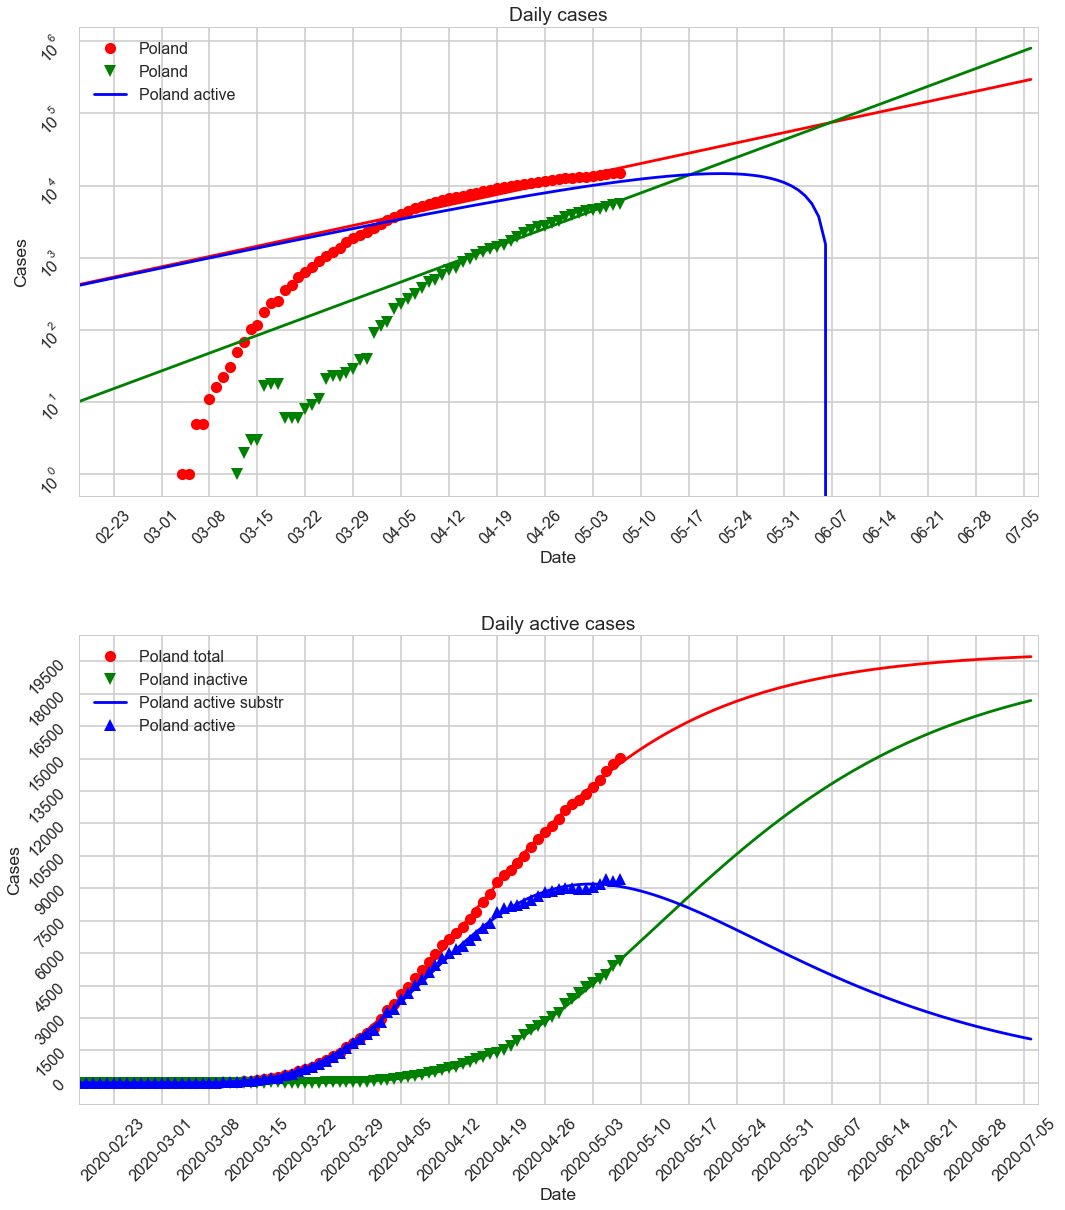

In [10]:
def normal_distribution(x, maximum, sigma, mu):
#    mu=103
    pi=3.14159
    y = (maximum / (sigma*np.sqrt(2*pi)))* np.exp(-0.5*(((x-mu)/sigma)**2))
    return y

def generalised_sigmoid_fixed(x, K, B, mi, x0):
    C=1.0
    y = K / (C + np.exp(-B*(x-x0)))**(1/mi)
    return y

# extract data for each country, divide by population and multiply by the value of per_num
dates=data["Date"].values
dates_num = mdates.date2num(dates)
dates_start = np.min(dates_num)
dates_num = dates_num - dates_start

days_to_extrapolate=60
dates_num_extrapolate = np.arange(0,len(dates_num)+days_to_extrapolate,1)

print(dates_num)
countries=[]
fits=[]
sig_fits=[]

fits_in=[]
sig_fits_in=[]
countries_in=[]

fixed_sig_fits_in = []
normal_fits_act = []
normal_fits_act_fixed = []

L = 210000
per_num=100000

for country in countries_to_plot:
    countries.append((data[country].values))
    #fit total
    popt, pcov = curve_fit(exponent, dates_num, (data[country].values), maxfev=10000)

    fixed_sigmoid = lambda x, k, b, x0: sigmoid(x, L , k, b, x0)
    #sig_popt, sig_pcov = curve_fit(fixed_sigmoid, dates_num, (data[country].values),p0=[1,1,15],maxfev=10000)
    sig_popt, sig_pcov = curve_fit(generalised_sigmoid, dates_num, (data[country].values), p0=[1,1,1,1,1], maxfev=1000000)
 
    fits.append(exponent(dates_num_extrapolate, *popt))
#    sig_fits.append(fixed_sigmoid(dates_num_extrapolate, *sig_popt))
    sig_fits.append(generalised_sigmoid(dates_num_extrapolate, *sig_popt))
    
#    sig_fits.append(sigmoid(dates_num_extrapolate, *sig_popt))
    
    countries_in.append((data_in[country].values))
    #fit inactive
    popt, pcov = curve_fit(exponent, dates_num, (data_in[country].values), maxfev=10000)
    sig_in_popt, sig_in_pcov = curve_fit(sigmoid, dates_num, (data_in[country].values),p0=[np.max(data[country].values),1,1,1],maxfev=10000)
    fits_in.append(exponent(dates_num_extrapolate, *popt))
    sig_fits_in.append(sigmoid(dates_num_extrapolate, *sig_in_popt))
    
    #fit to inactive sigmoid with top value equal to already known sigmoid of active
    L = np.max(generalised_sigmoid(dates_num_extrapolate, *sig_popt))
    #fixed_sigmoid = lambda x, k, b, x0: sigmoid(x, L , k, b, x0)
    #fixed_sig_popt, fixed_sig_pcov = curve_fit(fixed_sigmoid, dates_num, (data_in[country].values),p0=[1,1,25],maxfev=10000)    
    #fixed_sig_fits_in.append(fixed_sigmoid(dates_num_extrapolate, *fixed_sig_popt))
    
    ##use general sigmoid with fixed value
    K=L
    fixed_sigmoid = lambda x, B, mi, x0: generalised_sigmoid_fixed(x, K, B, mi, x0)
    fixed_sig_popt, fixed_sig_pcov = curve_fit(fixed_sigmoid, dates_num, (data_in[country].values), maxfev=10000)    
    fixed_sig_fits_in.append(fixed_sigmoid(dates_num_extrapolate, *fixed_sig_popt))
    
    
    #temporary generalised sigmoid
    #fixed_sig_popt, fixed_sig_pcov = curve_fit(generalised_sigmoid, dates_num, (data_in[country].values),maxfev=10000)
    #fixed_sig_fits_in.append(generalised_sigmoid(dates_num_extrapolate, *fixed_sig_popt))
    
    
    ##Fiting normal distribution to inactive with given maximum:
    
    normal_popt, normal_pcov = curve_fit(normal_distribution, dates_num, (data[country].values - data_in[country].values), maxfev=100000, p0=[6000,20,40])#p0=[6000,20], 
    normal_fits_act.append(normal_distribution(dates_num_extrapolate, *normal_popt))
    print(normal_popt)
    
    date_max = datetime.date(2020, 5, 3)
    x0 = int((mdates.date2num(date_max)))-dates_start
    mu = x0
    print("mu", mu)
    normal_distribution_fixed = lambda x, maximum, sigma: normal_distribution(x, maximum, sigma, mu)
    normal_popt, normal_pcov = curve_fit(normal_distribution_fixed, dates_num, (data[country].values - data_in[country].values), maxfev=100000, p0=[9000,20])#p0=[6000,20], 
    normal_fits_act_fixed.append(normal_distribution_fixed(dates_num_extrapolate, *normal_popt))
    
#    print(normal_fits_act)
    
    
    ## Create figure and plot space
    fig, (ax, ax2) = plt.subplots(2,1, figsize=(16, 18))
    


#Exponent fits
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'p', 'P')) 
color = itertools.cycle(('r', 'g', 'b', 'y','c','m','k'))
## Add x-axis and y-axis
for country, country_in, fit, fit_in, country_name in zip(countries, countries_in, fits, fits_in, countries_to_plot):
    col=next(color)
    ax.plot(dates, country, marker=next(marker), linestyle='', label=country_name, color=col)
    ax.plot(mdates.num2date(dates_num_extrapolate+dates_start), fit, color=col)

    col=next(color)    
    ax.plot(dates, country_in, marker=next(marker), linestyle='', label=country_name, color=col)    
    ax.plot(mdates.num2date(dates_num_extrapolate+dates_start), fit_in, color=col)

    col=next(color)
    ax.plot(mdates.num2date(dates_num_extrapolate+dates_start), fit - fit_in, label=country_name+" active", color=col)
    
## Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Daily cases")


#Sigmoidal fits
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'p', 'P')) 
color = itertools.cycle(('r', 'g', 'b', 'y','c','m','k'))
## Add x-axis and y-axis
for country, country_in, fit, fit_in, fixed_fit, country_name, normal_fit, normal_fit_fixed in zip(countries, countries_in, sig_fits, sig_fits_in, fixed_sig_fits_in, countries_to_plot, normal_fits_act, normal_fits_act_fixed):

    col=next(color)
    ax2.plot(dates, country, marker=next(marker), linestyle='', label=country_name+" total", color=col)
    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start), fit, color=col)
    
#    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start+25), fit, color=col)



    col=next(color)
    ax2.plot(dates, country_in, marker=next(marker), linestyle='', label=country_name+" inactive", color=col)
    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start), fixed_fit, color=col)
    
    col=next(color)
    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start), fit - fixed_fit, label=country_name+" active substr", color=col)    
#    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start), normal_fit, label=country_name+" active normal", color="blue")
#    ax2.plot(mdates.num2date(dates_num_extrapolate+dates_start), normal_fit_fixed, label=country_name+" active normal FIXED", color="orange")
    ax2.plot(dates, country - country_in, marker=next(marker), linestyle='', label=country_name+" active", color=col)




    
## Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Cases",
       title="Daily active cases")

## Define the date format
for axis in [ax,ax2]:
    tick_spacing=7
    axis.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    axis.tick_params(labelrotation=45)


    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ## axes limits
    axis.set_xlim([datetime.date(2020, 2, 18), datetime.date.today() + datetime.timedelta(days=days_to_extrapolate)])# datetime.date(2020, 3, 15)])
    axis.legend()
    axis.yaxis.set_major_locator(plt.MaxNLocator(15))
    
ax.set_yscale("log")

#ax.set_ylim([1,200000])

fig.tight_layout(pad=5.0) 
plt.show()